# <img src="https://img.icons8.com/dusk/64/000000/mind-map.png" style="height:50px;display:inline"> CS 236756 - Technion - Intro to Machine Learning
#### Tal Daniel
## Tutorial 07 - Linear Regression

<img src="./assets/tut_08_intro.jpg" style="height:200px">

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda

* The Regression Problem
    * Classification vs. Regression
* Linear Regression
    * The Least Squares Criterion & Solution
        * Residual Analysis
* Examples
    * Polynomial Fitting
    * Cosine Fitting
* Regularized Least Squares
    * Bias-Variance Tradeoff
    * Lasso vs. Ridge Regression

## <img src="https://img.icons8.com/nolan/96/000000/polyline.png" style="height:50px;display:inline"> The Regression Problem

### <img src="https://img.icons8.com/cotton/64/000000/fencing-swords.png" style="height:50px;display:inline"> Classification vs. Regression
* **Classification** is about predicting a label and **Regression** is about predicting a quantity.
* Predictive modeling is the problem of developing a model using historical data to make a prediction on new data.
    * Classification predictive modeling is the task of approximating a mapping function (f) from input variables (X) to *discrete* (categories, labels) output variables (y).
        * A classification algorithm may predict a continuous value, but the continuous value is in the form of a probability for a class label.
    * Regression predictive modeling is the task of approximating a mapping function (f) from input variables (X) to a *continuous* output variable (y).
        * A regression algorithm may predict a discrete value, but the discrete value in the form of an integer quantity.
* In some cases, it is possible to convert a regression problem to a classification problem. For example, the quantity to be predicted could be converted into discrete buckets (e.g. class 1: 0-50, class 2: 51-100).

|  | <center>Classification</center> | <center>Regression</center> 
| --- | --- | --- |
|<center> Input </center>| <center> Feature vector $X$ </center>| <center>Feature vector $X$</center>
|<center> Output </center>| <center> Label/Category - **Discrete** </center>| <center>Value - **Continuous**</center>
|<center> MLE </center>| <center> $\hat{\theta} = \underset{\theta \in \mathcal{R}^{p}}{\mathrm{argmax}} \log p(D|\theta)$ </center>| <center>$\hat{\theta} = \underset{\theta \in \mathcal{R}^{p}}{\mathrm{argmax}} \log p(D|\theta)$ </center>
|<center> Appropriate Models </center>| <center> Decision Trees, SVM, Neural Networks... </center>| <center>Decision Trees, Linear Regression Models, SVM, Neural Networks...</center>

### <img src="https://img.icons8.com/dusk/64/000000/classroom.png" style="height:50px;display:inline"> Example - House Price Model
Given the following dataset:

| <center>Square Feet (X)</center> | <center>House Price in \$1000 (y)</center> |
| --- | --- |
|<center> 1400 </center>| <center> 245 </center>|
|<center> 1600 </center>| <center> 312 </center>|
|<center> 1700 </center>| <center> 279 </center>|
|<center> 1875 </center>| <center> 308 </center>|
|<center> 1100 </center>| <center> 199 </center>|
|<center> 1550 </center>| <center> 219 </center>|
|<center> 2350 </center>| <center> 405 </center>|
|<center> 2450 </center>| <center> 324 </center>|
|<center> 1425 </center>| <center> 319 </center>|
|<center> 1700 </center>| <center> 255 </center>|

* We wish to predict the price of a house given its size
* More formally:
    * Given a house of size $x$, what is the price $y=f(x)$ of the house?


In [1]:
# imports for the tutorial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

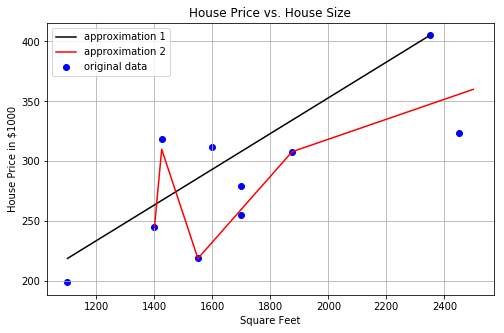

In [2]:
# let's plot the dataset
x = [1400, 1600, 1700, 1875, 1100, 1550, 2350, 2450, 1425, 1700]
y = [245, 312, 279, 308, 199, 219, 405, 324, 319, 255]
ap_x_1 = [1100, 2350]
ap_y_1 = [219, 405]
ap_x_2 = [1400, 1425, 1550, 1875, 2500]
ap_y_2 = [245, 310, 219, 308, 360]
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.scatter(x, y, label="original data", color='b')
ax.plot(ap_x_1, ap_y_1, label='approximation 1', color='k')
ax.plot(ap_x_2, ap_y_2, label='approximation 2', color='r')
ax.set_xlabel("Square Feet")
ax.set_ylabel("House Price in $1000")
ax.set_title("House Price vs. House Size")
ax.grid()
ax.legend()

* Which function $y=f(x)$ to choose?
* Assuming a **linear** connection between dependent and independent variables **limits** the search space (constarining the problem).

## <img src="https://img.icons8.com/dusk/64/000000/line.png" style="height:50px;display:inline"> Linear Regression
A linear model makes a prediction by computing a weighted sum of the input features, plus a constant called the *bias term* (also called *intercept* sometimes).

We denote:
* $\hat{y}$ - the predicted value
* $n$ - number of features
* $x_i$ is the $i^{th}$ feature value
* $\theta_j$ is the $j^{th}$ model parameter, where $\theta_0$ is the bias weight ($\theta_0 \cdot 1$)

The *Linear Regression* model prediction: $$ \hat{y} = \theta_0 + \theta_1 x_1 + ... + \theta_n x_n $$
In *vector* form: $$ \hat{y}=h_{\theta} (x) =\theta^T \cdot x $$

### <img src="https://img.icons8.com/dusk/64/000000/us-dollar.png" style="height:50px;display:inline"> Linear Regression Cost Function & Connection to MLE
How do we train a linear regression model?

* Training a model means tuning its parameters so that the model best fits to the training data (train set)
* The most common performance measure on a regression model is the Root Mean Square Error (RMSE), thus, we need to find the value of $\theta$ that minimzes the RMSE. In practice, it is simpler to minimize the Measn Square Error - **MSE** (the same values that minimize the RMSE, also minimize the MSE).
* The MSE Cost Function: $$ MSE(X, h_{\theta}) = \frac{1}{m}\sum_{i=1}^m (\theta^T \cdot x^{(i)} - y^{(i)})^2 $$
    * Pay attention to notations: $m$ is the number of samples, where $n$ is the number of features. That is, each sample has $n$ components.
    
#### <img src="https://img.icons8.com/dusk/64/000000/broken-link.png" style="height:30px;display:inline"> Connection to MLE
* Maximum Likelihood Estimation (MLE) is the most common way to estimate parameters of a statistical model by calculating: $$\hat{\theta} = \underset{\theta}{\mathrm{argmax}} \log p(y|x, \theta) $$
* The Negative Log Likelhood (NLL) under **i.i.d** assumption: $$ NLL(\theta) = -\log p(D|\theta) = -\sum_{i=1}^n \log p(y_i|x_i, \theta) $$
* If we assume that $$ P(y|x, \theta) = \mathcal{N}(\theta^Tx, \sigma^2) $$
    * Note: Why would we assume that? When collecting data from the real world, it is safe to assume that it would not be deterministic, that is, we assume that there is some underlying distribution. More formally, in the case of linear regression, we assume that the $y$ is indeed a linear deterministic function of the input, but with added noise $\epsilon \sim \mathcal{N}(0, \sigma^2)$ which leads to $y = \theta^T x + \epsilon \rightarrow p(y|x, \theta) = \mathcal{N}(\theta^T x, \sigma^2)$
* We get: $$ NLL(\theta) = -\sum_{i=1}^n \log \big[ \big( \frac{1}{2\pi \sigma^2} \big)^{\frac{1}{2}} e^{-\frac{1}{2\sigma^2}(y_i - \theta^Tx_i)^2} \big] = -\frac{N}{2} \log (2\pi \sigma^2) + \frac{1}{2\sigma^2} \sum_{i=1}^n (y_i - \theta^Tx_i)^2 $$

* Thus, **maximizing the log-likelihood** is equivalent to **minimizing the negative-log-likelihood** w.r.t to $\theta$: $$ \underset{\theta}{\mathrm{argmin}}\frac{1}{2\sigma^2} \sum_{i=1}^n (y_i - \theta^Tx_i)^2 =  \underset{\theta}{\mathrm{argmin}} \sum_{i=1}^n (y_i - \theta^Tx_i)^2 = \underset{\theta}{\mathrm{argmin}} \frac{1}{n} \sum_{i=1}^n (y_i - \theta^Tx_i)^2 = MSE(\theta) $$
    * The equalities are since $\sigma, n$ do not depend on $\theta$

### <img src="https://img.icons8.com/bubbles/100/000000/home.png" style="height:50px;display:inline">  Example Cont. - A Linear Model for the House Prices
* One independent variable (house size) which "explains" the dependent variable (house price)
    * <img src="./assets/tut_08_lr_1.jpg" style="height:200px">
    * <img src="./assets/tut_08_lr_2.jpg" style="height:200px">
* **Estimated Regression Model**:
    * The sample regression line provides an estimate of the population regression line ($\hat{y} = \mathbb{E}(y)$)
        * <img src="./assets/tut_08_lr_3.jpg" style="height:200px">
* **Linear Regression Assumptions**:
    * The underlying relationship between the $x$ variable and the $y$ variable is *linear*
    * Error values $\epsilon$ are statistically independent
    * The probabiity distribution of the errors is *normal* and independent of $x$ with mean 0 and an equal but *unknown* variance for all values of $x$: $p(\epsilon) = \mathcal{N}(0, \sigma^2)$ 

learned parameters:
[[ 0.10976774]
 [98.24832962]]
y_hat = 0.110x + 98.248330 (square feet)


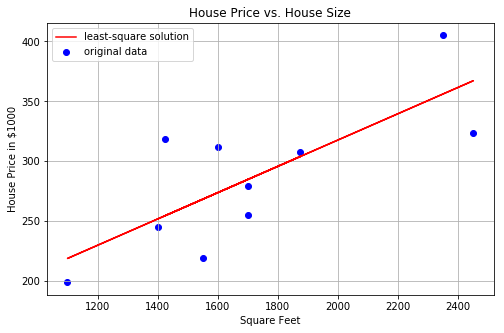

In [12]:
# solve the regression problem for the house price example
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)
x_with_bias = np.concatenate([x, np.ones(x.shape)], axis=1)
theta_ls = np.linalg.inv(x_with_bias.T @ x_with_bias) @ x_with_bias.T @ y # least-squares solution
print("learned parameters:")
print(theta_ls)
print("y_hat = {:.3f}x + {:3f} (square feet)".format(theta_ls[0][0], theta_ls[1][0]))
# plot
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.scatter(x, y, label="original data", color='b')
ax.plot(x, x_with_bias @ theta_ls, label='least-square solution', color='r')
ax.set_xlabel("Square Feet")
ax.set_ylabel("House Price in $1000")
ax.set_title("House Price vs. House Size")
ax.grid()
ax.legend()

### <img src="https://img.icons8.com/dusk/64/000000/timer.png" style="height:50px;display:inline"> Residual Analysis
* Purposes
    * Examine for **linearity assumption**
        * <img src="./assets/tut_08_res_1.jpg" style="height:200px">
    * Examine for constant variance for all levels of x
        * <img src="./assets/tut_08_res_2.jpg" style="height:200px">
    * Evaluate normal distribution assumption
* Graphical Analysis of Residuals
    * Can plot residuals vs. x
    * Can create histogram of residuals to check for normality

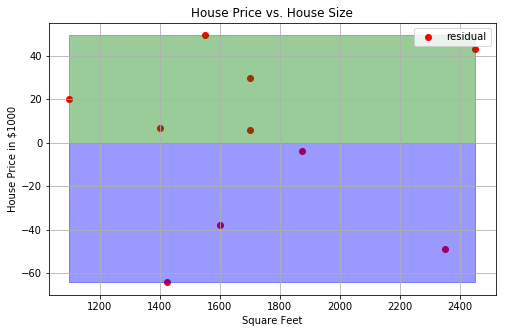

In [31]:
residuals = x_with_bias @ theta_ls - y
# plot
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.scatter(x, residuals, label='residual', color='r')
ax.fill_between(np.sort(x.reshape(-1,)), np.max(residuals), alpha=0.4, color="g")
ax.fill_between(np.sort(x.reshape(-1,)), np.min(residuals), alpha=0.4, color="b")
ax.set_xlabel("Square Feet")
ax.set_ylabel("House Price in $1000")
ax.set_title("House Price vs. House Size")
ax.grid()
ax.legend()

### <img src="https://img.icons8.com/doodle/96/000000/close-sign.png" style="height:50px;display:inline"> Closed-Form Leaset-Squares Solution
To find the value of $\theta$ that minimizes the cost function, there is a *closed-form solution* - a mathemtical equation that gives the result directly. It is also called the **Normal Equation**. We will now derive it.

* We wish to find a solution for $\hat{y} = X \theta$
* The parameters $\theta$ are obtained by minimzing the *sum of squared* errors or residuals (SSE): $$ SSE(\theta) = \sum_{i=1}^n (\theta^T x_i - y_i)^2 = ||X \theta -y ||_2^2 = (X\theta -y)^T(X\theta - y) = \theta^TX^TX\theta -\theta^TX^Ty - y^TX\theta +y^Ty$$
* Minimizing w.r.t to $\theta$: $$\nabla_{\theta}SSE(\theta) = 2X^TX\theta - 2X^Ty = 0 \rightarrow \theta^{*} = (X^TX)^{-1}X^Ty $$
* The matrix $(X^TX)^{-1}X^T$ is the *Pseudo Inverse* of $X$

### <img src="https://img.icons8.com/dusk/64/000000/double-down.png" style="height:50px;display:inline"> Gradient Descent Solution
Iterative solution, as we have seen in tutorial 6
#### <img src="https://img.icons8.com/dusk/64/000000/waypoint-map.png" style="height:30px;display:inline">Stochastic Gradient Descent (Mini-Batch Gradient Descent)
* **Pseudocode**:
    * **Require**: Learning rate $\alpha_k$
    * **Require**: Initial parameter $w$
    * **While** stopping criterion not met **do**
        * Sample a minibatch of $m$ examples from the training set ($m=1$ for SGD)
        * Set $\tilde{X} = [x_1,...,x_m] $ with corresponding targets $\tilde{Y} = [y_1,...,y_m]$
        * Compute gradient: $g \leftarrow 2\tilde{X}^T\tilde{X} - 2\tilde{X}^T \tilde{Y}$
        * Apply update: $w \leftarrow w - \alpha_k g$
        * $k \leftarrow k + 1$
    * **end while**

### <img src="https://img.icons8.com/dusk/64/000000/graph.png" style="height:50px;display:inline"> Basis Function Expansion
* What if the data is actually more complex than a simple linear line? But your data has just one feature per sample.
* Linear Regression can be made to model **non-linear** relationships by replacing $x$ with some non-linear functions of the inputs $\phi(x)$: $$ y = \theta_0 + \theta \phi(x) + \epsilon $$ This is also called **feature extraction**.
* The model is **still linear** in the parameters $\theta$ - it is still called *linear regression*.

### <img src="https://img.icons8.com/nolan/64/000000/fit-to-width.png" style="height:50px;display:inline"> Example - Polynomial Fitting (Polynomial Regression)
* Given $L$ measurements $\{x_k, y_k\}_{k=1}^L$ originating from the $n^{th}$ degree polynomial with additive white Gaussian noise $ y= h(x) + \epsilon$ where: $h(x)=\sum_{i=0}^n \theta_ix^i$ and $\epsilon \sim \mathcal{N}(0, \sigma^2)$ i.i.d
* **Goal**: find the coefficients $\{\theta_i\}_{i=0}^n$ to best fit the polynomial $h(x)$
* For each measurement $(x_k,y_k)$ we will fit the following model: $$ y_k = \theta_0 x_k^0 + \theta_1 x_k^1 + \theta_2 x_k^2 +... + \theta_n x_k^n , \forall k = 1,2,...,L$$ <img src="./assets/tut_08_poly_1.jpg" style="height:300px">
* **The Loss Function**: the optimization goal is to minimize the mean squared error $$ f_{\theta}(x) = \sum_{k=1}^L (y_k - (\theta_0 x_k^0 + \theta_1 x_k^1 + \theta_2 x_k^2 +... + \theta_n x_k^n))^2 $$
* Denote: $$ \Phi(X) = \begin{bmatrix}
  x_1^0 & \cdots & x_1^n \\
  \vdots & \vdots & \vdots \\
  x_L^0 & \cdots & x_L^n
 \end{bmatrix}, \theta = \begin{bmatrix}
  \theta_0 \\
  \vdots \\
  \theta_n 
 \end{bmatrix}, y =  \begin{bmatrix}
  y_1 \\
  \vdots \\
  y_L
 \end{bmatrix}$$
* **The Least-Squares Solution**: $$ \theta^{*} = (\Phi(X)^T\Phi(X))^{-1}\Phi(X)^Ty $$
* Example: we will fit $y=0.5x^2 + x + 2 + \epsilon$

Text(0.5,1,'y = 0.5*x^2 + x + 2 + epsilon')

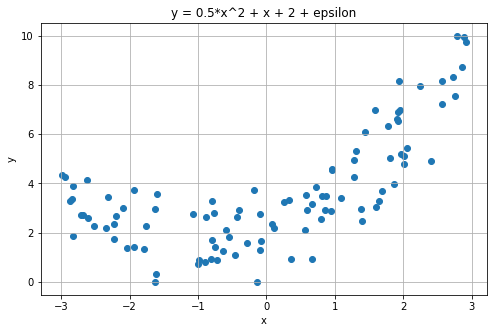

In [20]:
# let's try this
L = 100 # num of samples
X = np.sort(6 * np.random.rand(L, 1) - 3, axis=0)
epsilon = np.random.randn(L , 1)
y = 0.5 * X**2 + X + 2 + epsilon
# let's see it
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.scatter(X, y)
ax.grid()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("y = 0.5*x^2 + x + 2 + epsilon")

(100, 3)
theta:
[[2.096948  ]
 [0.95463611]
 [0.49799681]]


Text(0.5,1,'y = 0.5*x^2 + x + 2 + epsilon')

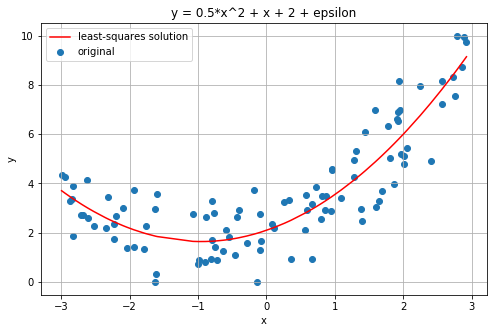

In [21]:
# 2 ways - manually or using scikit-learn
# manually
degree = 2
phi_x = np.concatenate([X**d for d in range(degree + 1)], axis=1)  # feature extraction
print(phi_x.shape)
theta_ls = np.linalg.inv(phi_x.T @ phi_x) @ phi_x.T @ y
print("theta:")
print(theta_ls)
# plot
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.scatter(X, y, label="original")
ax.plot(X, phi_x @ theta_ls, label="least-squares solution", color='r')
ax.grid()
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("y = 0.5*x^2 + x + 2 + epsilon")

(100, 3)
theta:
[[2.096948  ]
 [0.95463611]
 [0.49799681]]


Text(0.5,1,'y = 0.5*x^2 + x + 2 + epsilon')

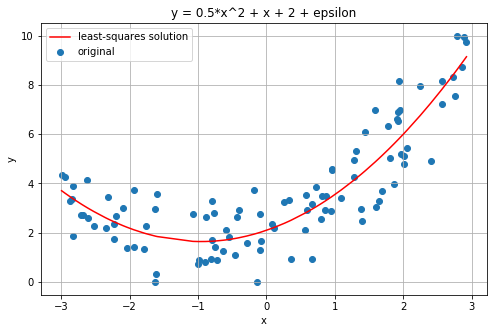

In [23]:
# using scikit-learn
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=True)
phi_x = poly_features.fit_transform(X)
print(phi_x.shape)
# continue the same
theta_ls = np.linalg.inv(phi_x.T @ phi_x) @ phi_x.T @ y
print("theta:")
print(theta_ls)
# plot
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.scatter(X, y, label="original")
ax.plot(X, phi_x @ theta_ls, label="least-squares solution", color='r')
ax.grid()
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("y = 0.5*x^2 + x + 2 + epsilon")

### <img src="https://img.icons8.com/nolan/64/000000/fit-to-width.png" style="height:50px;display:inline"> Example - Cosine Fitting
* Given $L$ measurements $\{x_k, y_k\}_{k=1}^L$ originating from the sinusoidal signal $h(x)$ with additive white Gaussian noise $ y= h(x) + \epsilon$ where: $h(x)=A\cos(2\pi f_0x_k + \psi)$ and $\epsilon \sim \mathcal{N}(0, \sigma^2)$ i.i.d and the frequency $f_0$ is given.
* **Goal**: find the amplitude $A$ and the phase $\psi$
* <img src="./assets/tut_08_cos.jpg" style="height:300px">
* **The Loss Function**: the optimization goal is to minimize the measn squared error $$ f_{\theta}(x) = \sum_{k=1}^L (y_k - A\cos(2\pi f_0x_k + \psi))^2 $$
    * The problem is not linear, not even in parameters
    * We will use the following trigonometric identity: $$ \cos(\alpha +\beta) = \cos(\alpha)\cos(\beta) - \sin(\alpha)\sin(\beta) \rightarrow A\cos(2\pi f_0x_k + \psi) = A\cos(\psi)\cos(2\pi f_0 x_k) - A\sin(\psi)sin(2\pi f_0 x_k) $$
    * We will also use the following transformation from polar coordinates: $$ \theta_1 = A \cos(\psi) $$ $$ \theta_2 = A \sin(\psi) $$
    * This yields: $$ f_{\theta}(x) = \sum_{k=1}^L (y_k - (\theta_1 \cos(2\pi f_0x_k) - \theta_2 \sin(2\pi f_0x_k)))^2 $$
        * The problem is now linear!
    
* Denote: $$ \Phi(X) = \begin{bmatrix}
  \cos(2\pi f_0 x_1) & -\sin(2\pi f_0 x_1) \\
  \vdots & \vdots \\
  \cos(2\pi f_0 x_L) & -\sin(2\pi f_0 x_L)
 \end{bmatrix}, \theta = \begin{bmatrix}
  \theta_1 \\
  \theta_2 
 \end{bmatrix}, y =  \begin{bmatrix}
  y_1 \\
  \vdots \\
  y_L
 \end{bmatrix}$$
* **The Least-Squares Solution**: $$ \theta^{*} = (\Phi(X)^T\Phi(X))^{-1}\Phi(X)^Ty $$
* Finally: $$ A = \sqrt{\theta_1^2 +\theta_2^2} $$ $$ \psi = \arctan\frac{\theta_2}{\theta_1} $$
* Example: we will fit $y=10\cos(2\pi \cdot 0.8 \cdot x + \frac{\pi}{3}) +\epsilon$

Text(0.5,1,'y = 10cos(2*pi*0.8*x + pi/3 ) + epsilon')

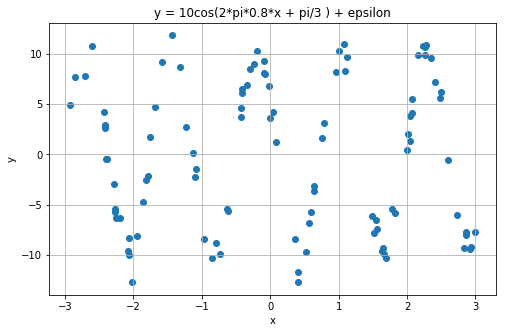

In [31]:
L = 100 # num of samples
x = np.sort(6 * np.random.rand(L, 1) - 3, axis=0)
epsilon = np.random.randn(L , 1)
f_0 = 0.8
psi = np.pi / 3
A = 10
y = A * np.cos(2 * np.pi * f_0 * x + psi) + epsilon
# let's see it
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.scatter(x, y)
ax.grid()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("y = 10cos(2*pi*0.8*x + pi/3 ) + epsilon")

(100, 2)
theta:
[[5.16707018]
 [8.48935462]]


Text(0.5,1,'y = 10cos(2*pi*0.8*x + pi/3 ) + epsilon')

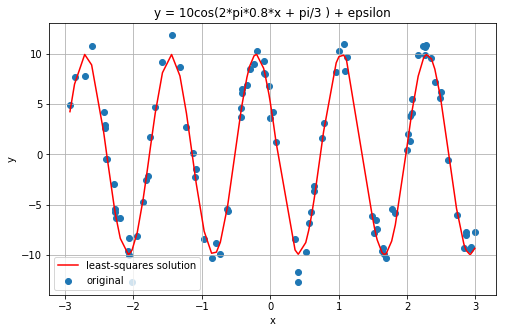

In [33]:
phi_x = np.concatenate([np.cos(2 * np.pi * f_0 * x), -np.sin(2 * np.pi * f_0 * x)], axis=1)
print(phi_x.shape)
theta_ls = np.linalg.inv(phi_x.T @ phi_x) @ phi_x.T @ y
print("theta:")
print(theta_ls)
A_pred = np.sqrt(np.sum(np.square(theta_ls)))
psi_pred = np.arctan(theta_ls[1] / theta_ls[0])
y_pred = A_pred * np.cos(2 * np.pi * f_0 * x + psi_pred)
# let's see it
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.scatter(x, y, label="original")
ax.plot(x, y_pred, label="least-squares solution", color='r')
ax.grid()
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("y = 10cos(2*pi*0.8*x + pi/3 ) + epsilon")

## <img src="https://img.icons8.com/color/96/000000/infinity-large.png" style="height:50px;display:inline"> Regularization
As we have already seen on previous tutorials, a good way to **reduce** overfitting is to regularize (i.e. constrain) the model. The fewer degrees of freedom it has, the harder it will be to overfit the data. For example, in *Polynomial Fitting*, a simple regularization would be to reduce the number of polynomial degrees. We will look at **Ridge & Lasso Regressions**, but first, we will review one of the most important concepts of ML.

### <img src="https://img.icons8.com/color/96/000000/wrestling.png" style="height:50px;display:inline"> The Bias-Variance Tradeoff
An important theoretical result of statistics and ML is the fact the **the model generalization error** can be expressed as a sum of 3 different errors: **bias, variance and irreducible error**.
* Given a **true** (but unknown) function $F(x)$ with noise $F(x) = f + \epsilon$, we seek to estimate it based on $n$ samples from a set $\mathcal{D}$. We denote the **regression function** as $g(x; \mathcal{D})$.
* The error of the regression model is given by: $$ MSE = \mathbb{E}_{\mathcal{D}} \big[F(x) -  (g(x; \mathcal{D}) )^2 \big] $$
* The total error can be decomposed into 3 terms: $$ E[(F - g )^2] = E[(f + \epsilon -g)^2] =  E[(f + \epsilon -g +E[g] - E[g])^2] = ... = (f - E[g])^2 +E[\epsilon^2] +E\big[(E[g] - g)^2\big] = Bias[g]^2 +\sigma^2 +Var[g]$$
    * <a href="https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff">Full derivation on Wikipedia </a>
* **Bias** - $(f - E[g])$: It is the difference between the expected value and the true value. This part of the generalization error is due to wrong assumptions (e.g. assuming the data is linear when it is actually quadratic). A *high-bias* model is most likely to **underfit** the training data.
* **Variance** - $E\big[(E[g] - g)^2\big]$: This part is due to the model's sensitivity to small variations in the training data. A model with many degrees of freedom (such as high-degree polynomial model) is likely to have **high variance**, and thus tend to **overfit** the training data. Low varaince - the estimate of $F$ does not change much as the training set varies.
* **Irreducible Error** - $\sigma^2$: This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (e.g., fix the data sources, detect and remove outliers...).
* **Note** - if we do not separate the real function from the noise, then the bias is considered the **expected difference between the model and the true function (+noise)** : $Bias[g] = E[g - F]$
* **Increasing** the model's *complexity* will typically **increase its variance** and **reduce its bias**. On the other hand, **reducing** the complexity **increases its bias** and **reduces its variance**.
* <img src="./assets/tut_08_bias_var.jpg" style="height:300px">
    * Image by <a href="http://scott.fortmann-roe.com/docs/BiasVariance.html">Scott Fortmann-Roe</a>
* <img src="./assets/tut_08_bias_var_2.jpg" style="height:600px">
    * Image from Duda, R. O., Hart, P. E., & Stork, D. G. (2012). Pattern classification. John Wiley & Sons

### <img src="https://img.icons8.com/dusk/64/000000/2.png" style="height:50px;display:inline"> Ridge Regression
* *Ridge Regression* (also called *Tikhonov Regularization*) is a regularized version of Linear Regression where the *regularization term* is equal to $\lambda \sum_{i=1}^n \theta_i^2$ ($l_2$) and is added to to the cost function.
* This form of cost function **forces** the algorithm not only to fit the data but also **keep the model weights as small as possible**.
* The regularization term is only added during **training**.
* The **hyperparameter** $\lambda$ controls how much to regularize the model.
    * **The Shrinking Effect**
        * When $\lambda \to 0$ we resort back to the (unconstrained) Least Squares solution.
        * As $\lambda$ increases, then all the weights end up very close to zero and the result is a **flat line** going through the data's mean.
* **Ridge Regression Cost Function**: $$ J(\theta) = MSE(\theta) +\lambda \sum_i\theta_i^2 $$
* **In Vector Form**: $$ J(\theta) = ||X \theta - y ||_2^2 +\lambda ||\theta ||_2^2 = (X \theta - y)^T(X \theta - y) + \lambda\theta^T\theta$$
* **The Gradient**: $$\nabla_{\theta}J(\theta) = 2(X^TX\theta - X^Ty) + 2\lambda\theta $$
* **The Closed-Form Solution**: $$ \theta^{*} = (X^TX +\lambda I)^{-1}X^Ty $$
* In Scikit-Learn:
    * Closed-Form:
        * `from sklearn.linear_model import Ridge`
        * `ridge_reg = Ridge(alpha=1, solver='cholesky')`
        * `ridge_reg.fit(X, y)`
        * `ridge_reg.predict([values])`
    * SGD:
        * `sgd_reg = SGDRegressor(penalty='l2')`
        * `sgd_reg.fit(X, y)`
        * `sgd_reg.predict([values])`
* <a style="color:red"> Important Notes </a>
    * Sometimes the bias weight $\theta_0$ is not regularized, and the sum starts from $i=1$, in vector form, the identity matrix $I$ is changed so the top-left value (first value on the diagonal) is zero.
    * It is important to **scale** the data (using `StandardScaler` for example) before performing Ridge Regression, as it is very sensitive to the scale of the input features. This is actually true for most regularized models.
* <br><img src="./assets/tut_08_alpha.jpg" style="height:400px">
    * Image from <a href="https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/">Analytics Vidhya </a>
    
### <img src="https://img.icons8.com/dusk/64/000000/1.png" style="height:50px;display:inline"> LASSO Regression
* *LASSO (Least Absolute Shrinkage and Selection Operator) Regression* is just like Ridge, but instead of $l_2$, it uses $l_1$ norm of the weight vector.
* * **LASSO Regression Cost Function**: $$ J(\theta) = MSE(\theta) +\lambda \sum_i|\theta_i| $$
* **In Vector Form**: $$ J(\theta) = ||X \theta - y ||_2^2 +\lambda ||\theta ||_1 $$
* The LASSO cost function is **not differentiable** at $\theta_i=0$, but Gradient Descent still works if we use the *sub-gradient vector*: $$ g(\theta,J) = \nabla_{\theta} MSE(\theta) + \lambda \begin{bmatrix}
  sign(\theta_1) \\
  \vdots \\
  sign(\theta_n)
 \end{bmatrix}, sign(\theta_i)= \begin{cases}
    -1       & \quad \text{if } \theta_i < 0 \\
    0       & \quad \text{if } \theta_i = 0 \\
    +1  & \quad \text{if } \theta_i > 0 
  \end{cases}$$ 
* LASSO Regression tends to **eliminate the weights of the least important features** (i.e., set to them zero). It automatically performs **Feature Selection** and outputs a *sparse* model (few non-zero weights).
* $l_1$ regularization is much more **robust to outliers**.
* In Scikit-Learn:
    * Algorithmic:
        * `from sklearn.linear_model import Lasso`
        * `ridge_reg = Lasso(alpha=0.1)`
        * `ridge_reg.fit(X, y)`
        * `ridge_reg.predict([values])`
    * SGD:
        * `sgd_reg = SGDRegressor(penalty='l1')`
        * `sgd_reg.fit(X, y)`
        * `sgd_reg.predict([values])`
* <br><img src="./assets/tut_08_alpha_2.jpg" style="height:400px">
    * Image from <a href="https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/">Analytics Vidhya </a>
        
<br><img src="./assets/tut_08_lass_ridge.jpg" style="height:400px">

* While LASSO is more robust to outliers, Ridge provides a more balanced minimization of the weights.
        
### <img src="https://img.icons8.com/dusk/64/000000/plus-2-math.png" style="height:50px;display:inline"> Other Regularizations
* **ElasticNet** - a combination between Ridge and Lasso (both $l_1$ and $l_2$ regularizations)
* A more generalized regularizer: $$ \frac{1}{2}\sum_{i=1}^n (\theta^Tx_i - y_i)^2 + \lambda \sum_{j=0}^M |\theta_j|^q$$
* <br><img src="./assets/tut_08_reg.jpg" style="height:200px">


## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/
* Examples and code snippets were taken from <a href="http://shop.oreilly.com/product/0636920052289.do">"Hands-On Machine Learning with Scikit-Learn and TensorFlow"</a>